# Machine learning Project  

# Medical Appointment No Shows! Project

For this project we will be analyzing some Medical Appointment No Shows on Kaggle. 
The data contains the following fields in year 2016:
    
- PatientId - Identification of a patient Appointment ,Identification of each appointment 
- Gender = Male or Female . Female is the greater proportion, woman takes way more care of they health in comparison to man. 
- Schedule Day = The day of the actual appointment, when they have to visit the doctor. 
- Appointment Day = The day someone called or registered the appointment, this is before appointment of course. 
- Age = How old is the patient. 
- Neighborhood = Where the appointment takes place. 
- Scholarship = Ture of False .
- Hypertension = True or False
- Diabetes = True or False 
- Alcoholism = True or False 
- Handicap = True or False 
- SMS received = 1 or more messages sent to the patient. 
- No-show = True or False.

Source of data: https://www.kaggle.com/joniarroba/noshowappointments

# Import The Necassery libraries

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly 
import matplotlib.patches as patches
%matplotlib inline
import datetime as datetime

# Read the Data, and setup

In [3]:
df =pd.read_csv('/content/drive/My Drive/Machine-learning- project/submission/ML-project-codes/No-Show.csv')

To see the firts five rows of the data

In [4]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No-show
0,2.990000e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.590000e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.260000e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.680000e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.840000e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


## Missing Values

In [5]:
df.isnull().any()

PatientId         False
AppointmentID     False
Gender            False
ScheduledDay      False
AppointmentDay    False
Age               False
Neighbourhood     False
Scholarship       False
Hypertension      False
Diabetes          False
Alcoholism        False
Handicap          False
SMS_received      False
No-show           False
dtype: bool

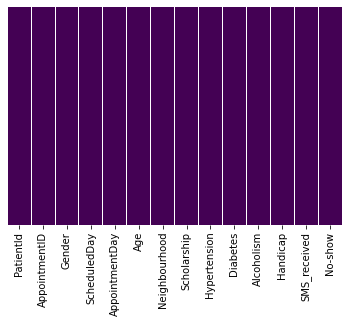

In [6]:
sns.heatmap(df.isnull(), yticklabels=False,cbar=False,cmap='viridis')

In [7]:
df.duplicated().any()

False

Change the data type of PationtId to the string to deal with it

In [8]:
df['PatientId']=df['PatientId'].apply(lambda x: str(x))

Remove the duplicated rows by PatientId and ScheduleId

In [9]:
index_Dup=df[df.duplicated(['PatientId','ScheduledDay'])].index

In [10]:
for i in index_Dup:
    df.drop(index=i,inplace=True)

In [11]:
df[df.duplicated(['PatientId','ScheduledDay'])]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No-show


So we removed all the duplicated rows with the same PaitentId and ScheduleDate

In [12]:
cols=df.columns
cols

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hypertension',
       'Diabetes', 'Alcoholism', 'Handicap', 'SMS_received', 'No-show'],
      dtype='object')

### To see if there is any blank or space value in our dataset 

In [13]:
df[
     (df['ScheduledDay']==' ') 
   | (df['ScheduledDay']==' ')
   | (df['AppointmentDay']==' ')
   | (df['Neighbourhood']==' ')
   | (df['Neighbourhood']==' ')
   | (df['No-show']==' ')
  ].any()

PatientId         False
AppointmentID     False
Gender            False
ScheduledDay      False
AppointmentDay    False
Age               False
Neighbourhood     False
Scholarship       False
Hypertension      False
Diabetes          False
Alcoholism        False
Handicap          False
SMS_received      False
No-show           False
dtype: bool

Now we can do the visualization as our data is clean 

# Dealing with dummy values

The two columns, incuding Gender and Age have dummy values.
So, in order to deal with their data we should convert them into numbers 0 or 1

Gender: 0=Female, 1=Male

No_Show: 0=No, 1=Yes

In [14]:
Gender=pd.get_dummies(data=df['Gender'],drop_first=True)

Change the column name from M to Gender

In [15]:
Gender=Gender.rename(columns={'M':'Gender'})

Do the same process for No-Show columnn

In [16]:
No_Show=pd.get_dummies(data=df['No-show'], drop_first=True)

In [17]:
No_Show=No_Show.rename(columns={'Yes':'No-Show'})

In [18]:
df.describe()

,AppointmentID,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received
count,1.091920e+05,109192.000000,109192.000000,109192.000000,109192.000000,109192.000000,109192.000000,109192.000000
mean,5.675754e+06,37.097306,0.098231,0.197377,0.071864,0.030497,0.022199,0.322862
std,7.116219e+04,23.140747,0.297628,0.398021,0.258264,0.171950,0.161109,0.467573
min,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.640751e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5.680912e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,5.725954e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [19]:
df[df['Age']<0].iloc[0]

PatientId            466000000000000.0
AppointmentID                  5775010
Gender                               F
ScheduledDay      2016-06-06T08:58:13Z
AppointmentDay    2016-06-06T00:00:00Z
Age                                 -1
Neighbourhood                    ROMÃO
Scholarship                          0
Hypertension                         0
Diabetes                             0
Alcoholism                           0
Handicap                             0
SMS_received                         0
No-show                             No
Name: 99832, dtype: object

Remove the Age<-1 as it is none sense

In [20]:
df.drop(index=99832, inplace=True)

In [21]:
df[df['Age']<0]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No-show


Mode of the Age

In [22]:
#df.groupby(by='Age').count()
from statistics import mode
mode(df['Age'].tolist())

0

0 is most frequent value

In [23]:
df['Age'].tolist().count(0)

3524

With the numbber of 3539

Deal with the handi-cap data

In [24]:
df['Handicap'].unique()

array([0, 1, 2, 3, 4])

As it is not the thing that we want, we are going to replace the data with the value more than 1 with one. so classify the value of handi cap with 0 or 1


In [25]:
list_hand_Remove=df[df['Handicap']>1].index
list_hand_Remove

Int64Index([   946,   1665,   2071,   2091,   2213,   2214,   2673,   5424,
              5467,   5475,
            ...
            105008, 105073, 105322, 105753, 108335, 108376, 109484, 109733,
            109975, 110107],
           dtype='int64', length=195)

In [26]:
for i in list_hand_Remove:
    df['Handicap'].loc[i]=1

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [27]:
df[df['Handicap']>1].index

Int64Index([], dtype='int64')

In [28]:
df['Handicap'].unique()

array([0, 1])

# Add these two columns to the data frame and drop the previous ones

In [29]:
df.drop(['No-show','Gender'] , axis=1, inplace=True)

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 109191 entries, 0 to 110526
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   PatientId       109191 non-null  object
 1   AppointmentID   109191 non-null  int64 
 2   ScheduledDay    109191 non-null  object
 3   AppointmentDay  109191 non-null  object
 4   Age             109191 non-null  int64 
 5   Neighbourhood   109191 non-null  object
 6   Scholarship     109191 non-null  int64 
 7   Hypertension    109191 non-null  int64 
 8   Diabetes        109191 non-null  int64 
 9   Alcoholism      109191 non-null  int64 
 10  Handicap        109191 non-null  int64 
 11  SMS_received    109191 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 15.8+ MB


In [31]:
df=pd.concat([df,Gender,No_Show], axis=1)

In [32]:
df.head()

,PatientId,AppointmentID,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,Gender,No-Show
0,29900000000000.0,5642903.0,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62.0,JARDIM DA PENHA,0.0,1.0,0.0,0.0,0.0,0.0,0,0
1,559000000000000.0,5642503.0,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56.0,JARDIM DA PENHA,0.0,0.0,0.0,0.0,0.0,0.0,1,0
2,4260000000000.0,5642549.0,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62.0,MATA DA PRAIA,0.0,0.0,0.0,0.0,0.0,0.0,0,0
3,868000000000.0,5642828.0,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8.0,PONTAL DE CAMBURI,0.0,0.0,0.0,0.0,0.0,0.0,0,0
4,8840000000000.0,5642494.0,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56.0,JARDIM DA PENHA,0.0,1.0,1.0,0.0,0.0,0.0,0,0


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 109192 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       109191 non-null  object 
 1   AppointmentID   109191 non-null  float64
 2   ScheduledDay    109191 non-null  object 
 3   AppointmentDay  109191 non-null  object 
 4   Age             109191 non-null  float64
 5   Neighbourhood   109191 non-null  object 
 6   Scholarship     109191 non-null  float64
 7   Hypertension    109191 non-null  float64
 8   Diabetes        109191 non-null  float64
 9   Alcoholism      109191 non-null  float64
 10  Handicap        109191 non-null  float64
 11  SMS_received    109191 non-null  float64
 12  Gender          109192 non-null  uint8  
 13  No-Show         109192 non-null  uint8  
dtypes: float64(8), object(4), uint8(2)
memory usage: 11.0+ MB


## Look through the Date columns(ScheduleDay )

In [34]:
type(df['ScheduledDay'][0])

str

As ScheduledDay is SRT we need to work on Timestamp data, so we onvert this column to the Timestamp

In [35]:
df['ScheduledDay']=pd.to_datetime(df['ScheduledDay'])
type(df['ScheduledDay'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [36]:
time=df['ScheduledDay'].iloc[0]
time.hour
time.year
time.month
time.dayofweek

4

In [37]:
df['hour']=df['ScheduledDay'].apply(lambda x: x.hour)
df['year']=df['ScheduledDay'].apply(lambda x: x.year)
df['month']=df['ScheduledDay'].apply(lambda x: x.month)
df['dayofweek']=df['ScheduledDay'].apply(lambda x: x.dayofweek)
df['date']=df['ScheduledDay'].apply(lambda x: x.date())

To see if there is any null value after adding these columns to the dataframe

In [38]:
df.isnull().any()

PatientId          True
AppointmentID      True
ScheduledDay       True
AppointmentDay     True
Age                True
Neighbourhood      True
Scholarship        True
Hypertension       True
Diabetes           True
Alcoholism         True
Handicap           True
SMS_received       True
Gender            False
No-Show           False
hour               True
year               True
month              True
dayofweek          True
date               True
dtype: bool

In [39]:
df[df['PatientId'].isnull()]

,PatientId,AppointmentID,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,Gender,No-Show,hour,year,month,dayofweek,date
99832,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaT


In [40]:
df[df['dayofweek'].isnull()]

,PatientId,AppointmentID,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,Gender,No-Show,hour,year,month,dayofweek,date
99832,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaT


We can see there is one null row need to be removed 

In [41]:
df.drop(index=99832, inplace=True)

In [42]:
df.isnull().any()

PatientId         False
AppointmentID     False
ScheduledDay      False
AppointmentDay    False
Age               False
Neighbourhood     False
Scholarship       False
Hypertension      False
Diabetes          False
Alcoholism        False
Handicap          False
SMS_received      False
Gender            False
No-Show           False
hour              False
year              False
month             False
dayofweek         False
date              False
dtype: bool

### Data is clean now for visualization. However, beforehand, we should export DF into cv File for the machine learning model 

In [43]:
df.to_csv('No-Show - Clean.csv')

# Visualization

In [44]:
df.head()

,PatientId,AppointmentID,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,Gender,No-Show,hour,year,month,dayofweek,date
0,29900000000000.0,5642903.0,2016-04-29 18:38:08+00:00,2016-04-29T00:00:00Z,62.0,JARDIM DA PENHA,0.0,1.0,0.0,0.0,0.0,0.0,0,0,18.0,2016.0,4.0,4.0,2016-04-29
1,559000000000000.0,5642503.0,2016-04-29 16:08:27+00:00,2016-04-29T00:00:00Z,56.0,JARDIM DA PENHA,0.0,0.0,0.0,0.0,0.0,0.0,1,0,16.0,2016.0,4.0,4.0,2016-04-29
2,4260000000000.0,5642549.0,2016-04-29 16:19:04+00:00,2016-04-29T00:00:00Z,62.0,MATA DA PRAIA,0.0,0.0,0.0,0.0,0.0,0.0,0,0,16.0,2016.0,4.0,4.0,2016-04-29
3,868000000000.0,5642828.0,2016-04-29 17:29:31+00:00,2016-04-29T00:00:00Z,8.0,PONTAL DE CAMBURI,0.0,0.0,0.0,0.0,0.0,0.0,0,0,17.0,2016.0,4.0,4.0,2016-04-29
4,8840000000000.0,5642494.0,2016-04-29 16:07:23+00:00,2016-04-29T00:00:00Z,56.0,JARDIM DA PENHA,0.0,1.0,1.0,0.0,0.0,0.0,0,0,16.0,2016.0,4.0,4.0,2016-04-29


### Bar graph of gender who came for appointment and did not come

In [45]:
Gender_label={0:'Female',1:'Male'}
df['Gender-name']=df['Gender'].map(Gender_label)

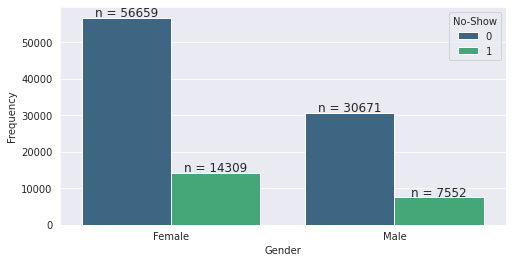

In [46]:
sns.set_style('darkgrid')
plt.figure(figsize=(8,4))
ax=sns.countplot(data=df,x='Gender-name', hue='No-Show',palette='viridis')
plt.xlabel('Gender')
plt.ylabel('Frequency')
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+0.2, height+ 300, 'n = %.0f'%(height),horizontalalignment='center',fontsize=12)

This column graph illustrates the number of patients who showed up and did not show up for the arranged appointments by gender, either the patient is a male or a female. From 109192 appointmets,  70969 of them are female patients while 38223 of them are male patients. 20.16% of the female patients did not show up while among male, 19.76% did not show up for the appointments. This has shown larger percentage of patients not showing up were among female.

### bar graph, based on the day of week based on Appointment day 

In [47]:
dayofweek={0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
df['dayofweek-name']=df['dayofweek'].map(dayofweek)

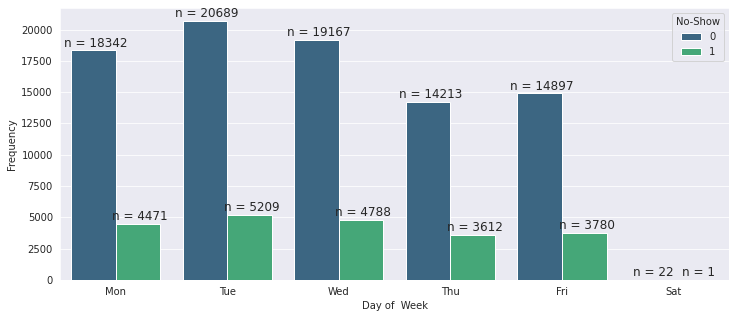

In [48]:
plt.figure(figsize=(12,5))
ax=sns.countplot(data=df,x='dayofweek-name', hue='No-Show',palette='viridis',order=['Mon','Tue','Wed','Thu','Fri','Sat'])
plt.xlabel('Day of  Week')
plt.ylabel('Frequency')
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+0.22, height+ 300, 'n = %.0f'%(height),horizontalalignment='center',fontsize=12)

This column graph illustrates the number of patients who showed up and did not show up for the arranged appointments by the day of the week, from Monday to Saturday only. It can be seen that 22813 appointments were on Monday, 25898 appointments were on Tuesday, 23955 appointments were on Wednesday, 17826 appointments were on Thursday, 18677 appointments were on Friday and 23 appointments were on Saturday. No appointments were made on Sunday indicating the hospital is closed or not receiving appointments on Sunday. From the comparison, most appointments were made on Tuesday and the least was on Saturday. The percentage of patients not showing up by days are 19.60%, 20.11%, 19.99%, 20.26%, 20.24%, 4.35% respectively from Monday to Saturday. It can be concluded for appointments made on weekdays, the percentage of not showing up was close to each other, with the largest percentage of patients not showing up are those made on Thursday. It can be seen the percentage of not showing up is independent of the number appointments made on that day.

### histogram, based on the month of Appointment 

In [49]:
df['month'].unique()

array([ 4.,  3.,  2.,  1.,  5., 11., 12.,  6.])

In [50]:
month_name={1:'Jan',2:'Feb',3:'Mar', 4:'Apr', 
            5:'May', 6:'Jun', 7:'Jul',8:'Aug',
            9:'Sep',10:'Oct',11:'Nov',12:'Dec'}
df['month_name']=df['month'].map(month_name)

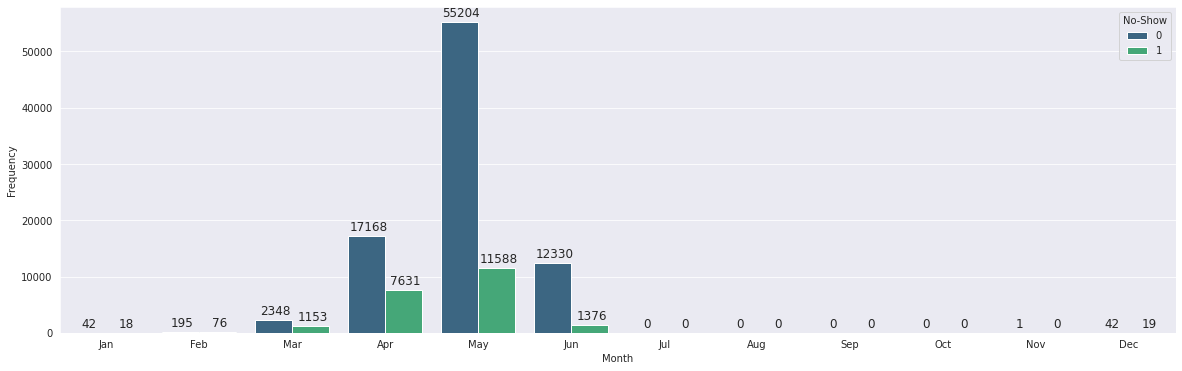

In [51]:
plt.figure(figsize=(20,6))
ax=sns.countplot(data=df,x='month_name', hue='No-Show',palette='viridis'
              ,order=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.xlabel('Month')
plt.ylabel('Frequency')
for p in ax.patches:
    height = p.get_height()
    if (pd.isnull(height)==True):
        height=0
    ax.text(p.get_x()+0.22, height+ 1000, '%.0f'%(height),horizontalalignment='center',fontsize=12)
   

This column graph illustrates the number of patients who showed up and did not show up for the arranged appointments by months excluding July, August, September and October. We could assume some events occur during the four months that caused inability for the hospital to receive appointments or to record the data. It can be seen that 60 appointments were made on January, 271 appointments on Febuary, 3501 appointments on March, 24799 appointments on April, 66793 appointments on May, 13706 appointments on June, 1 appointment on November and 61 appointments on December. From the comparison, most appointments were made on May, and the elast was on November. The percentage of appointmnents not being attended by patients by months are 30%, 28.04%, 32.93%, 30.77%, 17.35%, 10.04% respectively from January to June, 0% for November and 31.15% for December. It can be concluded that the largest percentage of patients not showing up are those made on March. The percentage of unattended appointment is independent on the number of appointments made on the day.

### histogram, based on the time of appointment 

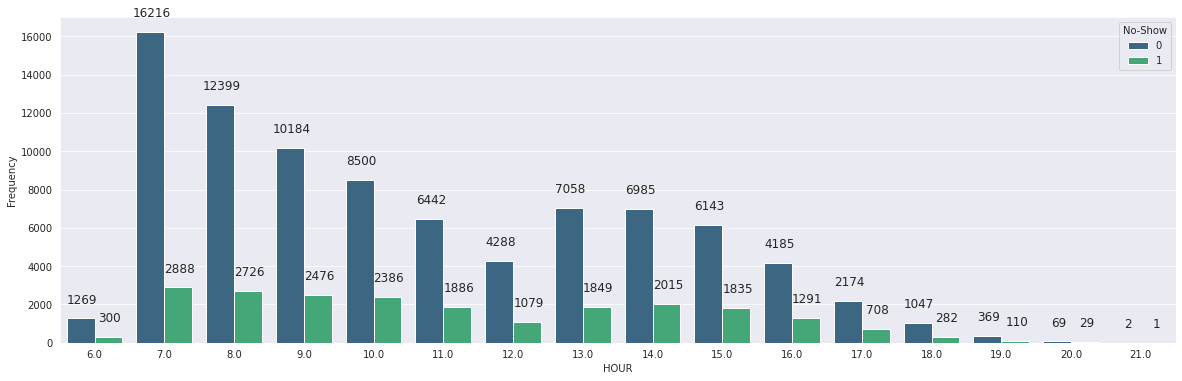

In [52]:
plt.figure(figsize=(20,6))
ax=sns.countplot(data=df,x='hour', hue='No-Show',palette='viridis')
plt.xlabel('HOUR')
plt.ylabel('Frequency')
for p in ax.patches:
    height = p.get_height()
    if (pd.isnull(height)==False):
        ax.text(p.get_x()+0.22, height+ 800, '%.0f'%(height),horizontalalignment='center',fontsize=12)

This column graph illustrates the number of appointments being arranged from 6.00 am until 9.00 pm. It can be seen that 1569 appointments were made at 6.00am, 19104 appointments at 7.00am, 15126 appointments at 8.00am, 12660 appointments at 9.00am, 10886 appointments at 10.00am, 8328 appointments at 11.00am, 5367 appointments at 12.00pm, 8907 appointments at 1.00pm, , 9000 appointments at 2.00pm, , 7978 appointments at 3.00pm, 5476 appointments at 4.00pm, 2882 appointments at 5.00pm, 1329 appointments at 6.00pm, 479 appointments at 7.00pm, 98 appointments at 8.00pm and 3 appointments at 9.00pm. From the comparison, the most appointments were made at 7.00am and the least was at 9.00pm. The graph shows a fluctuating pattern, in which the most peak hour receiving the most patients were between 7.00am untill 9.00am, from that, it started to decrease until 12.00pm where it started to increase for the next hour, then decrase again gradually until 9.00pm. No appointments were made between 10.00pm until 5.00am. This could indicate the hospital was already closed between those time. The percentage of patients not showing up by time are 19.12%, 15.12%, 18.02%, 19.56%, 21.92%, 22.65%, 20.10%, 20.76%, 22.39%, 23%, 23.58%, 24.57%, 21.22%, 22.96%, 29.60% and 33.33%, respectively from 6.00am until 9.00pm. It can be concluded that the largest percentage of patients not showing up are those made at 9.00pm. It can be seen the percentage of not showing up in inverse proportional to the number of appointments made at the time as can be seen in the case of appointments made at 7.00 am and 9.00pm.

# GROUP BY

In [53]:
GroupByMonth=df.groupby(by='month').count()

In [54]:
GroupByMonth

,PatientId,AppointmentID,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,Gender,No-Show,hour,year,dayofweek,date,Gender-name,dayofweek-name,month_name
month,,,,,,,,,,,,,,,,,,,,,
1.0,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60
2.0,271,271,271,271,271,271,271,271,271,271,271,271,271,271,271,271,271,271,271,271,271
3.0,3501,3501,3501,3501,3501,3501,3501,3501,3501,3501,3501,3501,3501,3501,3501,3501,3501,3501,3501,3501,3501
4.0,24799,24799,24799,24799,24799,24799,24799,24799,24799,24799,24799,24799,24799,24799,24799,24799,24799,24799,24799,24799,24799
5.0,66792,66792,66792,66792,66792,66792,66792,66792,66792,66792,66792,66792,66792,66792,66792,66792,66792,66792,66792,66792,66792
6.0,13706,13706,13706,13706,13706,13706,13706,13706,13706,13706,13706,13706,13706,13706,13706,13706,13706,13706,13706,13706,13706
11.0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
12.0,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61


simple plot off of the dataframe indicating the count of scheduels per month

Text(0, 0.5, 'Frequency')

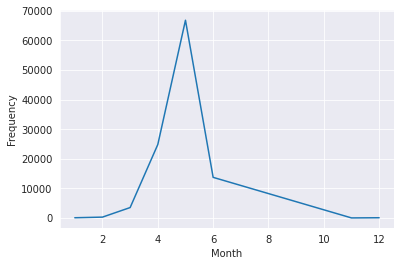

In [55]:
GroupByMonth['Age'].plot()
plt.xlabel('Month')
plt.ylabel('Frequency')

The line graph shows how the increase and decrease of number of appointments made by months. It can be summarized that the number of appointments made at the beginning of the year was quiet small, where it gradually increased reaching its peak at around May. From there, the number plummeted until June, where it started to gradually decrease reaching the end of the year at a very small number of appointments. In range, months between April and June reported the highest number of appointments made.

 lmplot() to create a linear fit on the number of schedueles per month

Text(-15.075000000000003, 0.5, 'Age')

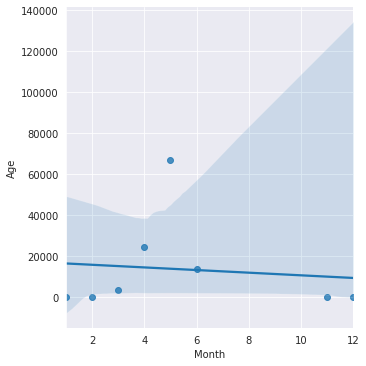

In [56]:
sns.lmplot(x='month', y='Age', data=GroupByMonth.reset_index())
plt.xlabel('Month')
plt.ylabel('Age')

This grid shows a general downward or decreasing pattern of number of appointments made by months from January until December.

In [57]:
GroupByDate=df.groupby(by='date').count()

In [58]:
GroupByDate

,PatientId,AppointmentID,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,Gender,No-Show,hour,year,month,dayofweek,Gender-name,dayofweek-name,month_name
date,,,,,,,,,,,,,,,,,,,,,
2015-11-10,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
2015-12-03,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
2015-12-07,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10
2015-12-08,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37
2015-12-14,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-06-03,2486,2486,2486,2486,2486,2486,2486,2486,2486,2486,2486,2486,2486,2486,2486,2486,2486,2486,2486,2486,2486
2016-06-04,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
2016-06-06,2396,2396,2396,2396,2396,2396,2396,2396,2396,2396,2396,2396,2396,2396,2396,2396,2396,2396,2396,2396,2396


Text(0, 0.5, 'Frequency')

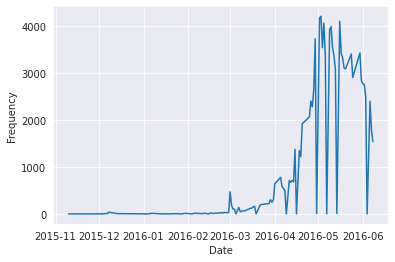

In [59]:
GroupByDate['Age'].plot()
plt.xlabel('Date')
plt.ylabel('Frequency')

This line graph shows the increase and decrease of number of appointments by date. From the line graph, it is seen that the earliest appointment recorded was on November 2015 and latest was in June 2016. It can be understood that appointemnets started to be recorded or taken seriously from March 2016 onwards. From November 2015 until Febuary 2016, there was no sigfificant increase or decrease in the number of appointments, the graph stayed almost the same. However at March 2016,the number of appointments showed a slight increase. Then the increase grew gradually until May 2016 with a number of fluctuation in between. In the last part, between May 2016 until June 2016, the line graph illustrates sharp fluctuations. The pattern in this line graph agrees with the previous line graph where most appointments were made berween April and June.

GroupByHour=df.groupby(by='hour').count()

In [60]:
GroupByHour=df.groupby(by='hour').count()

In [61]:
GroupByHour

,PatientId,AppointmentID,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,Gender,No-Show,year,month,dayofweek,date,Gender-name,dayofweek-name,month_name
hour,,,,,,,,,,,,,,,,,,,,,
6.0,1569,1569,1569,1569,1569,1569,1569,1569,1569,1569,1569,1569,1569,1569,1569,1569,1569,1569,1569,1569,1569
7.0,19104,19104,19104,19104,19104,19104,19104,19104,19104,19104,19104,19104,19104,19104,19104,19104,19104,19104,19104,19104,19104
8.0,15125,15125,15125,15125,15125,15125,15125,15125,15125,15125,15125,15125,15125,15125,15125,15125,15125,15125,15125,15125,15125
9.0,12660,12660,12660,12660,12660,12660,12660,12660,12660,12660,12660,12660,12660,12660,12660,12660,12660,12660,12660,12660,12660
10.0,10886,10886,10886,10886,10886,10886,10886,10886,10886,10886,10886,10886,10886,10886,10886,10886,10886,10886,10886,10886,10886
11.0,8328,8328,8328,8328,8328,8328,8328,8328,8328,8328,8328,8328,8328,8328,8328,8328,8328,8328,8328,8328,8328
12.0,5367,5367,5367,5367,5367,5367,5367,5367,5367,5367,5367,5367,5367,5367,5367,5367,5367,5367,5367,5367,5367
13.0,8907,8907,8907,8907,8907,8907,8907,8907,8907,8907,8907,8907,8907,8907,8907,8907,8907,8907,8907,8907,8907
14.0,9000,9000,9000,9000,9000,9000,9000,9000,9000,9000,9000,9000,9000,9000,9000,9000,9000,9000,9000,9000,9000


Text(0, 0.5, 'Frequency')

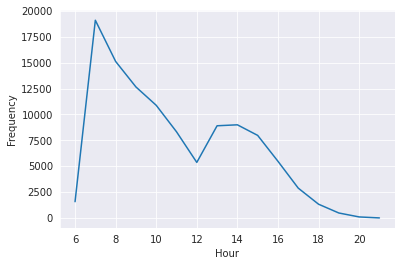

In [62]:
GroupByHour['Age'].plot()
plt.xlabel('Hour')
plt.ylabel('Frequency')

This line graph indicates the pattern of number of appointmnets between 6am until 9pm. It can be summarized that the number increased rapidly between 6am and 7am. From there, it slowly decreased until 12pm. WIthin one hour from there, there was a slight increase. However, the number slowly decreased from 1pm until 9pm. In general, patients prefer to set appointments in the morning compared to later in the evening, eventhough this does not ensure their attendance.

In [63]:
GroupByHour_noSH=df[df['No-Show']==1].groupby(by='hour').count()
GroupByHour_noSH

,PatientId,AppointmentID,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,Gender,No-Show,year,month,dayofweek,date,Gender-name,dayofweek-name,month_name
hour,,,,,,,,,,,,,,,,,,,,,
6.0,300,300,300,300,300,300,300,300,300,300,300,300,300,300,300,300,300,300,300,300,300
7.0,2888,2888,2888,2888,2888,2888,2888,2888,2888,2888,2888,2888,2888,2888,2888,2888,2888,2888,2888,2888,2888
8.0,2726,2726,2726,2726,2726,2726,2726,2726,2726,2726,2726,2726,2726,2726,2726,2726,2726,2726,2726,2726,2726
9.0,2476,2476,2476,2476,2476,2476,2476,2476,2476,2476,2476,2476,2476,2476,2476,2476,2476,2476,2476,2476,2476
10.0,2386,2386,2386,2386,2386,2386,2386,2386,2386,2386,2386,2386,2386,2386,2386,2386,2386,2386,2386,2386,2386
11.0,1886,1886,1886,1886,1886,1886,1886,1886,1886,1886,1886,1886,1886,1886,1886,1886,1886,1886,1886,1886,1886
12.0,1079,1079,1079,1079,1079,1079,1079,1079,1079,1079,1079,1079,1079,1079,1079,1079,1079,1079,1079,1079,1079
13.0,1849,1849,1849,1849,1849,1849,1849,1849,1849,1849,1849,1849,1849,1849,1849,1849,1849,1849,1849,1849,1849
14.0,2015,2015,2015,2015,2015,2015,2015,2015,2015,2015,2015,2015,2015,2015,2015,2015,2015,2015,2015,2015,2015


Text(0, 0.5, 'Frequency')

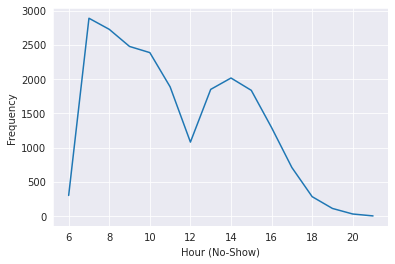

In [64]:
GroupByHour_noSH['Age'].plot()
plt.xlabel('Hour (No-Show)')
plt.ylabel('Frequency')

On the other hand, this line graph concentrates on the the pattern of number of appointmnets not being fulfilled ( not shown) by patients between 6am until 9pm. It can be summarized that the number increased rapidly between 6am and 7am. From there, it slowly decreased until 12pm. WIthin one hour from there, there was a slight increase. However, the number slowly decreased from 1pm until 9pm. In general, the pattern agrees with the overall appointments numbers by hours, set up by patients. However, this line graph illustrates more gradual decrese compared to the previous line graph.

Text(-2.4499999999999957, 0.5, 'Frequency')

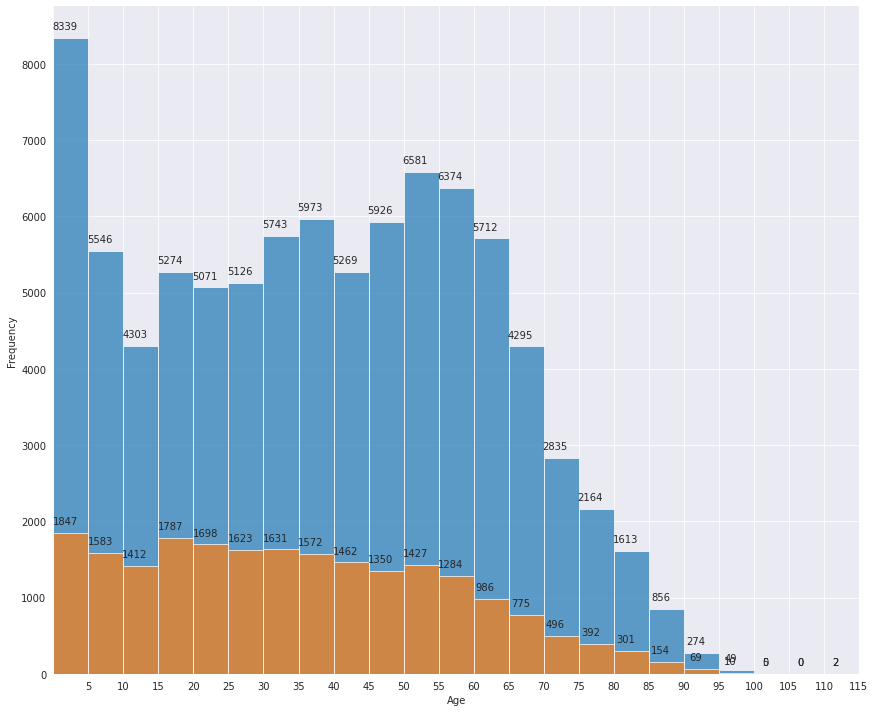

In [65]:

g=sns.FacetGrid(data=df, hue='No-Show', height=10, aspect=1.2)
g=g.map(plt.hist, 'Age',alpha=0.7, bins=23).set(xlim=(0, 115), 
                                                xticks=[5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95,100,105,110,115])
for ax in g.axes.ravel():#this will loop over the different figures in the grid    
    for p in ax.patches:#this will loop over the different bars in each figure         
        ax.annotate("%d" % p.get_height(), (p.get_x() + p.get_width() / 3., p.get_height()+20),  
                    ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.xlabel('Age')
plt.ylabel('Frequency')
#Reference https://www.physicsforums.com/threads/writing-numbers-on-the-bars-on-a-seaborn-facetgrid-figure.938970/

Text(-2.4499999999999957, 0.5, 'Frequency')

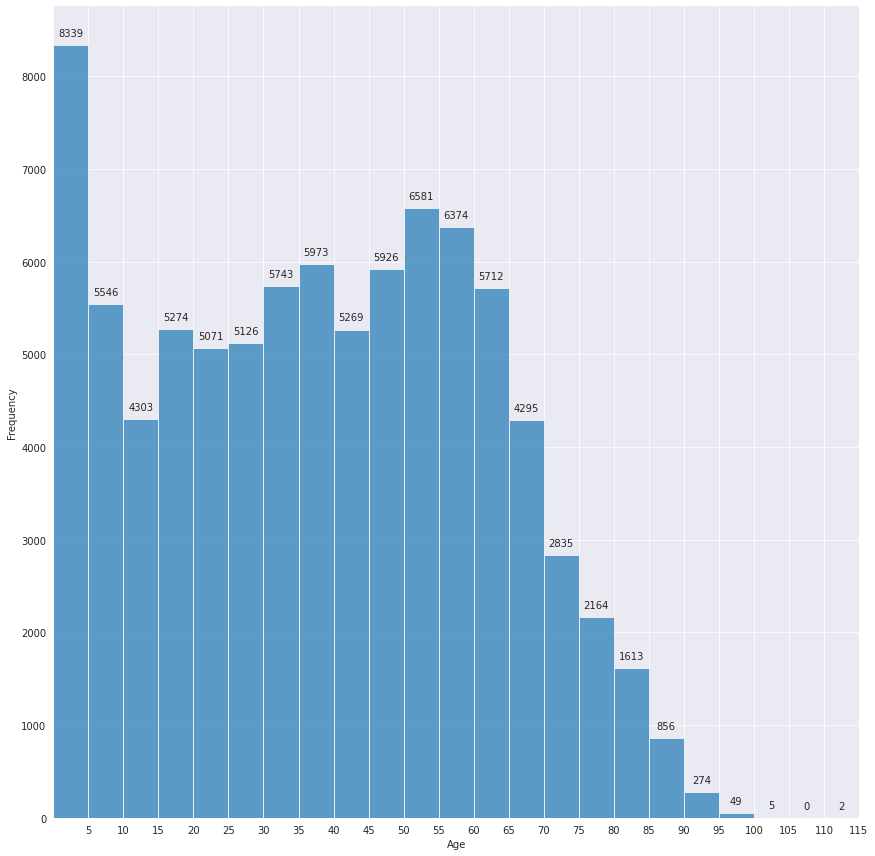

In [66]:
df_Show=df[df['No-Show']==0]
g=sns.FacetGrid(data=df_Show, height=12, aspect=1)
g=g.map(plt.hist, 'Age',alpha=0.7, bins=23).set(xlim=(0, 115), 
                                                xticks=[5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95,100,105,110,115])
for ax in g.axes.ravel():#this will loop over the different figures in the grid    
    for p in ax.patches:#this will loop over the different bars in each figure         
        ax.annotate("%d" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()+20),  
                    ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.xlabel('Age')
plt.ylabel('Frequency')
#Reference https://www.physicsforums.com/threads/writing-numbers-on-the-bars-on-a-seaborn-facetgrid-figure.938970/

### Age frequency of the people who show

The histogram depicts the distribution of appointments being fulfilled based on age of the patients. Grouped by 5 years for each bar, The top three with highest attendance are those aged between 0 and 5 accounted at 8340 attendance, aged between 50-55 accounted at 6581 attendance and aged between 55 and 60 accounted at 6374 attendance. The patterns shows a flactuation, where the number of appointements being attended decreases rapidly from 0-5 age range to 10-15 age range then it flactuates slighhty between age range 15-20 until 50-55 and finally it decreases until age range 110-115. This pattern agrees with the overall pattern of the number of appointments made by age.


Age frequency of the people who Not-show

Text(-2.700000000000003, 0.5, 'Frequency')

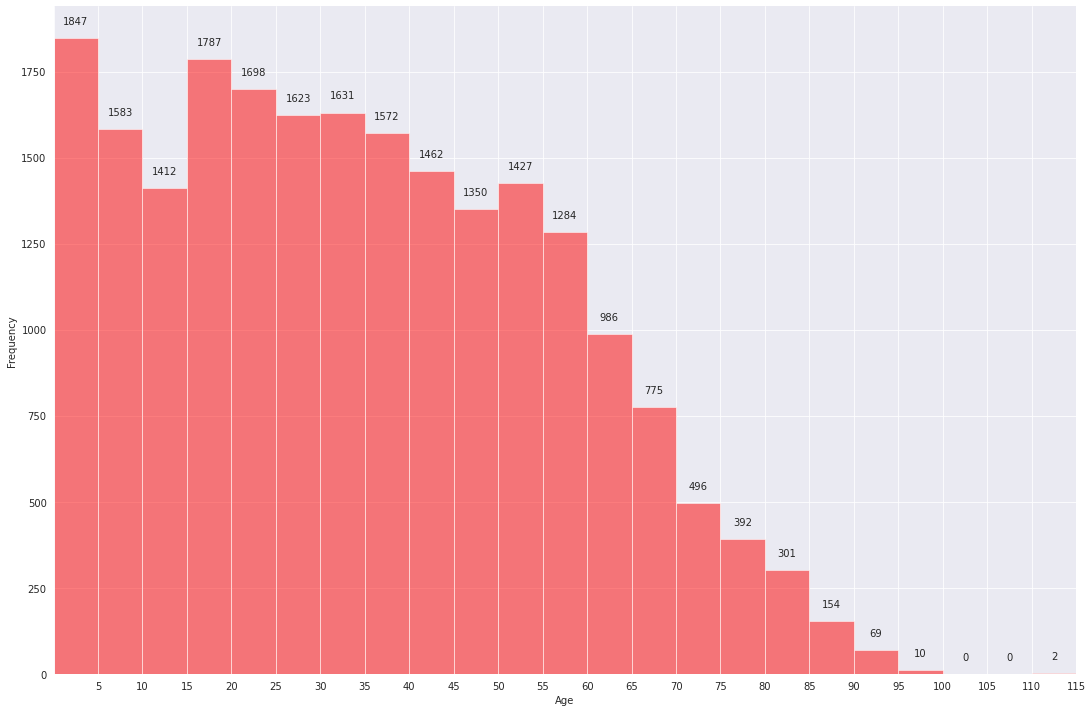

In [67]:
df_no_Show=df[df['No-Show']==1]
g=sns.FacetGrid(data=df_no_Show, height=10, aspect=1.5)
g=g.map(plt.hist, 'Age', bins=23,color='red', alpha=0.5).set(xlim=(0, 115), 
                                                xticks=[5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95,100,105,110,115])
for ax in g.axes.ravel():#this will loop over the different figures in the grid    
    for p in ax.patches:#this will loop over the different bars in each figure         
        ax.annotate("%d" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()+20),  
                    ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.xlabel('Age')
plt.ylabel('Frequency')
#Reference https://www.physicsforums.com/threads/writing-numbers-on-the-bars-on-a-seaborn-facetgrid-figure.938970/

### Age frequency of the people who did not show

The histogram depicts the distribution of appointments not being fulfilled based on age of the patients. Grouped by 5 years for each bar, The top three with highest absence are those aged between 0 and 5 accounted at 1847 absence, aged between 15-20 accounted at 1787 absence and aged between 20-35 accounted at 1698 absence. The patterns shows a steady flactuation, where the number of missed appointements  decreases slightly from 0-5 age range to 10-15 age range then it increase again in the next age range then it shows a decreasing pattern till the last age range category. Comparing both histogram on the attended and missed appointments, flactuation in the latter one is more steady. However, the overall pattern agrees with the overall pattern of the number of appointments made by age.

In [68]:
df[(df['Age']>100) & (df['Age']<105)]

,PatientId,AppointmentID,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,Gender,No-Show,hour,year,month,dayofweek,date,Gender-name,dayofweek-name,month_name
58014,976000000000000.0,5651757.0,2016-05-03 09:14:53+00:00,2016-05-03T00:00:00Z,102.0,CONQUISTA,0.0,0.0,0.0,0.0,0.0,0.0,0,0,9.0,2016.0,5.0,1.0,2016-05-03,Female,Tue,May
90372,234000000000.0,5751563.0,2016-05-31 10:19:49+00:00,2016-06-02T00:00:00Z,102.0,MARIA ORTIZ,0.0,0.0,0.0,0.0,0.0,0.0,0,0,10.0,2016.0,5.0,1.0,2016-05-31,Female,Tue,May


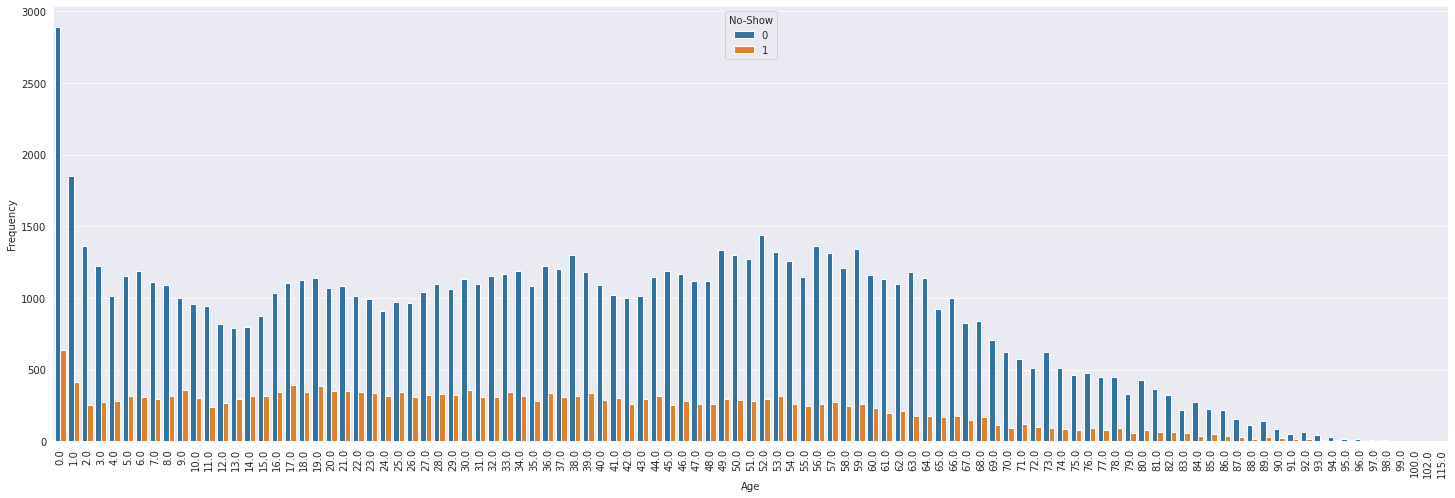

In [69]:
plt.figure(figsize=(25,8))
ax=sns.countplot(data=df,x='Age', hue='No-Show')
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

### Distribution of frequency by individual age

In general, the chart illustrates a flactuation pattern accross the age. The highest number for attended appoinments are among the young children until three years. From there, flactuation can be seen across all ages when it finally decreases among patients aged between 73 until 115. Similarly for the missed appointment, the highest was among the children aged between 0 until 1 only. The flactuation begins across all ages until it starts to decrease among patients aged 60 to 115. Comapring both distribution, the distribution for attended appointment

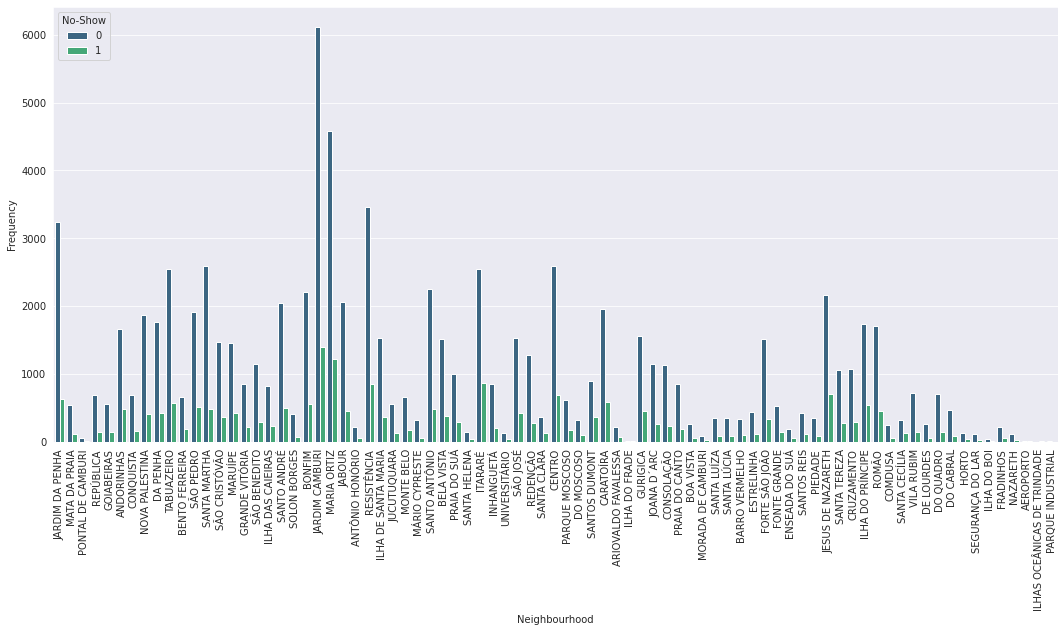

In [70]:
plt.figure(figsize=(18,8))
ax=sns.countplot(data=df,x='Neighbourhood', hue='No-Show', palette='viridis')
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.xlabel('Neighbourhood')
plt.ylabel('Frequency')
plt.show()

### Column chart in the distribution frequency of attended and missed appointments by neighbourhood

The column chart illustrates the number of attended and missed appointments by patients, based on their location or neighbourhood. It can be seen the two highest number of missed appointments are from the neighbourhood of Jardim Camburi and Maria Ortiz. In addition, large number of those that showed up were also from this neighbourhood. Since the location of the hospital is not mentioned, it is an assumption that the hospital is located near to this neighbourhood. It might also due to the factor of the income of the people in these two areas. As for the lowest number of appointments, the neighbourhoods of Ilha Do Frade, Aeroporto, Ilhas Oceanicas De Trinade and Parque Industrial were in this category.

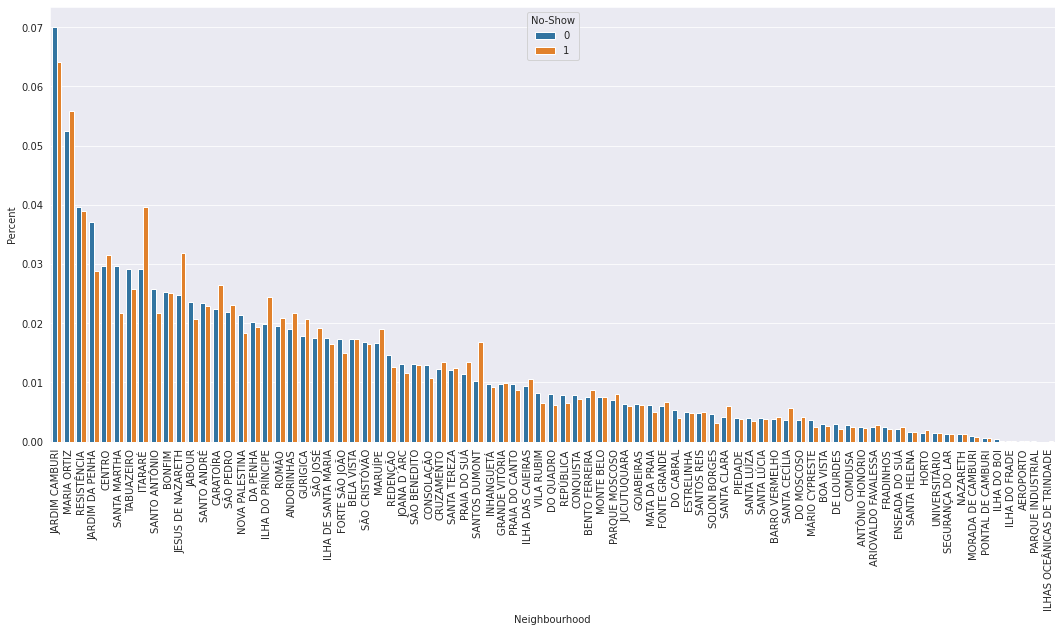

In [71]:
x, y, hue = 'Neighbourhood', 'percent', 'No-Show'
plt.figure(figsize=(18,8))
axes = plt.subplot()
prop_df = (df[x].groupby(df[hue]).value_counts(normalize=True).rename(y).reset_index())
sns.barplot(x=x, y=y, hue=hue, data=prop_df, ax=axes)
axes.set_xticklabels(axes.get_xticklabels(),rotation=90)
plt.xlabel('Neighbourhood')
plt.ylabel('Percent')
plt.show()

In [72]:
df.columns

Index(['PatientId', 'AppointmentID', 'ScheduledDay', 'AppointmentDay', 'Age',
       'Neighbourhood', 'Scholarship', 'Hypertension', 'Diabetes',
       'Alcoholism', 'Handicap', 'SMS_received', 'Gender', 'No-Show', 'hour',
       'year', 'month', 'dayofweek', 'date', 'Gender-name', 'dayofweek-name',
       'month_name'],
      dtype='object')

In [73]:
# sns.pairplot(data=df,vars=['Age','Scholarship', 'Hypertension', 'Diabetes',
#        'Alcoholism', 'Handicap', 'SMS_received', 'Gender', 'No-Show', 'hour',
#        'year', 'month', 'dayofweek'])

The grid illustrates the relationship between pairs of different variables from the patient data set. The variables include 'Age','Scholarship', 'Hypertension', 'Diabetes','Alcoholism', 'Handicap', 'SMS_received', 'Gender', 'No-Show', 'hour', 'year', 'month', 'dayofweek'. The grid intends to show possible relationship among the pairs. However, since the data are categorical except for age, the grid is quiet insignificant for the purpose.

# OUT layers

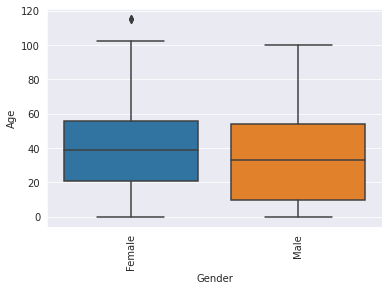

In [74]:
#plt.figure(figsize=(18,8))
ax=sns.boxplot(data=df,y='Age', x='Gender-name')
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.xlabel('Gender')
plt.ylabel('Age')
plt.show()

The box plot illustrates possible outliers in the data set. It was found that there is a female aged 115 among the patients. Considering that there are possibility of people living this long, we did not exclude the data. 

In [75]:
df[df['Age']>110]

,PatientId,AppointmentID,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,Gender,No-Show,hour,year,month,dayofweek,date,Gender-name,dayofweek-name,month_name
63912,32000000000000.0,5700278.0,2016-05-16 09:17:44+00:00,2016-05-19T00:00:00Z,115.0,ANDORINHAS,0.0,0.0,0.0,0.0,1.0,0.0,0,1,9.0,2016.0,5.0,0.0,2016-05-16,Female,Mon,May
68127,32000000000000.0,5562812.0,2016-04-08 14:29:17+00:00,2016-05-16T00:00:00Z,115.0,ANDORINHAS,0.0,0.0,0.0,0.0,1.0,0.0,0,1,14.0,2016.0,4.0,4.0,2016-04-08,Female,Fri,Apr
76284,32000000000000.0,5744037.0,2016-05-30 09:44:51+00:00,2016-05-30T00:00:00Z,115.0,ANDORINHAS,0.0,0.0,0.0,0.0,1.0,0.0,0,0,9.0,2016.0,5.0,0.0,2016-05-30,Female,Mon,May
97666,748000000000000.0,5717451.0,2016-05-19 07:57:56+00:00,2016-06-03T00:00:00Z,115.0,SÃO JOSÉ,0.0,1.0,0.0,0.0,0.0,1.0,0,0,7.0,2016.0,5.0,3.0,2016-05-19,Female,Thu,May


SMS  can affect the Not-Show value, as the number of the people who not show has not recieved SMS are more than the people who has not shown and recieved SMS

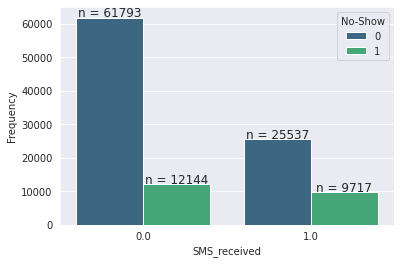

In [76]:
ax=sns.countplot(data=df, x='SMS_received', hue='No-Show',palette='viridis')
plt.xlabel('SMS_received')
plt.ylabel('Frequency')
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+0.2, height+ 300, 'n = %.0f'%(height),horizontalalignment='center',fontsize=12)

### Distribution of appointment attenance based on whether patients receive SMS or not

This column graph compares the number of appointments fulfilled and not fulfilled by the patients in the aspect of either they received SMS from the hospital or not. It can be summarized that among the total number of appointments, 35255 patients received SMS while 73937 did not. As for the percentage of not showing up, 27.56% were among those that received SMS and 16.42% from those who did not. It can be concluded that receiving SMS is not an influencing factor for patients showing up or not.


In [77]:
df.columns

Index(['PatientId', 'AppointmentID', 'ScheduledDay', 'AppointmentDay', 'Age',
       'Neighbourhood', 'Scholarship', 'Hypertension', 'Diabetes',
       'Alcoholism', 'Handicap', 'SMS_received', 'Gender', 'No-Show', 'hour',
       'year', 'month', 'dayofweek', 'date', 'Gender-name', 'dayofweek-name',
       'month_name'],
      dtype='object')

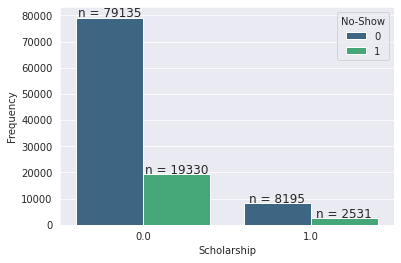

In [78]:
ax=sns.countplot(data=df, x='Scholarship', hue='No-Show',palette='viridis')
plt.xlabel('Scholarship')
plt.ylabel('Frequency')
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+0.2, height+ 300, 'n = %.0f'%(height),horizontalalignment='center',fontsize=12)

### Distribution appointment attendance based on whether patients have scholarship or not

This column graph compares the number of appointments fulfilled and not fulfilled by the patients in the aspect of either they received medical funding or not. It can be summarized that among the total number of appointmets, 10726 patients received the funding while 98466 did not. As for the percentage of not showing up, 23.60% were among those that received funding and 19.63% from those who did not. It can be concluded that receiving funding is not an influencing factor for patients showing up or not.

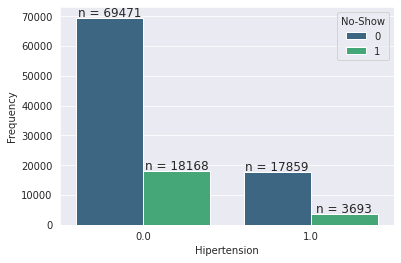

In [79]:
ax=sns.countplot(data=df, x='Hypertension', hue='No-Show',palette='viridis')
plt.xlabel('Hipertension')
plt.ylabel('Frequency')
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+0.2, height+ 300, 'n = %.0f'%(height),horizontalalignment='center',fontsize=12)

### Distribution of appointment attendace based on patients diagnosis on hypertension

This column graph compares the number of appointments fulfilled and not fulfilled by the patients in the aspect of either they had hypertension or not. It can be summarized that among the total number of appointmets, 21552 patients had hypertension while 87640 did not. As for the percentage of not showing up, 17.14% were among those that had hypertension and 20.73% from those who did not. It can be concluded that having hypertension is not an influencing factor for patients showing up or not.

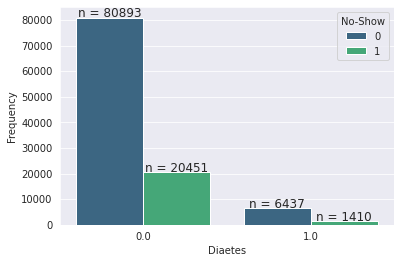

In [80]:
ax=sns.countplot(data=df, x='Diabetes', hue='No-Show',palette='viridis')
plt.xlabel('Diaetes')
plt.ylabel('Frequency')
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+0.2, height+ 300, 'n = %.0f'%(height),horizontalalignment='center',fontsize=12)

### Distribution of appointment attendance based on patient diagnosis of diabetes

This column graph compares the number of appointments fulfilled and not fulfilled by the patients in the aspect of either they had diabetes or not. It can be summarized that among the total number of appointmets, 7847 patients had diabetes while 101345 did not. As for the percentage of not showing up, 17.97% were among those that had diebetes and 20.18% from those who did not. It can be concluded that being diebetic is not an influencing factor for patients showing up or not.

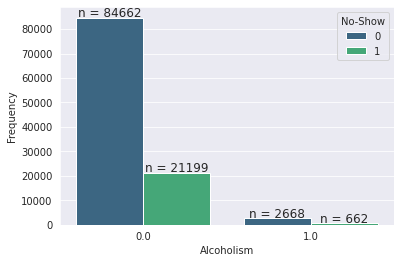

In [81]:
ax=sns.countplot(data=df, x='Alcoholism', hue='No-Show',palette='viridis')
plt.xlabel('Alcoholism')
plt.ylabel('Frequency')
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+0.2, height+ 300, 'n = %.0f'%(height),horizontalalignment='center',fontsize=12)

### Distribution of appointment attendance based on patient diagnosis of alcoholism

This column graph compares the number of appointments fulfilled and not fulfilled by the patients in the aspect of either they had alcoholism or not. It can be summarized that among the total number of appointmets, 3330 patients had alcoholism while 105862 did not. As for the percentage of not showing up, 19.88% were among those that had had alcoholism and 20.03% from those who did not. It can be concluded that having alcoholism is not an influencing factor for patients showing up or not.

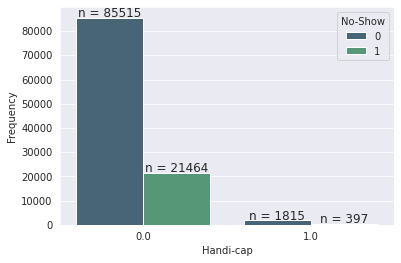

In [82]:
ax=sns.countplot(data=df, x='Handicap', hue='No-Show',saturation=0.5,palette='viridis')
plt.xlabel('Handi-cap')
plt.ylabel('Frequency')
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+0.2, height+ 300, 'n = %.0f'%(height),horizontalalignment='center',fontsize=12)

### Distribution of appointment attendance based on whether patients are handicapped or not

This column graph compares the number of appointments fulfilled and not fulfilled by the patients in the aspect of either they were handicapped or not. It can be summarized that among the total number of appointmets, 2212 patients were handicapped while 106980 were not. As for the percentage of not showing up, 17.95% were among those that were handicapped and 20.06% from those who were not. It can be concluded that being handicapped is an not an influencing factor for patients showing up or not.

In [83]:
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

print(__version__) # requires version >= 1.9.0

4.4.1


In [84]:
import cufflinks as cf
init_notebook_mode(connected=True)
cf.go_offline()

Using Cufflinks and iplot()

* scatter
* bar
* box
* spread
* ratio
* heatmap
* surface
* histogram
* bubble

In [85]:
df['Age'].iplot(kind='histogram')

# Pie Cahrts

In [86]:
df.head()

,PatientId,AppointmentID,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,Gender,No-Show,hour,year,month,dayofweek,date,Gender-name,dayofweek-name,month_name
0,29900000000000.0,5642903.0,2016-04-29 18:38:08+00:00,2016-04-29T00:00:00Z,62.0,JARDIM DA PENHA,0.0,1.0,0.0,0.0,0.0,0.0,0,0,18.0,2016.0,4.0,4.0,2016-04-29,Female,Fri,Apr
1,559000000000000.0,5642503.0,2016-04-29 16:08:27+00:00,2016-04-29T00:00:00Z,56.0,JARDIM DA PENHA,0.0,0.0,0.0,0.0,0.0,0.0,1,0,16.0,2016.0,4.0,4.0,2016-04-29,Male,Fri,Apr
2,4260000000000.0,5642549.0,2016-04-29 16:19:04+00:00,2016-04-29T00:00:00Z,62.0,MATA DA PRAIA,0.0,0.0,0.0,0.0,0.0,0.0,0,0,16.0,2016.0,4.0,4.0,2016-04-29,Female,Fri,Apr
3,868000000000.0,5642828.0,2016-04-29 17:29:31+00:00,2016-04-29T00:00:00Z,8.0,PONTAL DE CAMBURI,0.0,0.0,0.0,0.0,0.0,0.0,0,0,17.0,2016.0,4.0,4.0,2016-04-29,Female,Fri,Apr
4,8840000000000.0,5642494.0,2016-04-29 16:07:23+00:00,2016-04-29T00:00:00Z,56.0,JARDIM DA PENHA,0.0,1.0,1.0,0.0,0.0,0.0,0,0,16.0,2016.0,4.0,4.0,2016-04-29,Female,Fri,Apr


### Show and no-show count

([<matplotlib.patches.Wedge at 0x7f032fb0ef28>,
 [Text(0.26541395691152203, -1.067499616616591, 'Show'),
  Text(-0.265414056858048, 1.0674995917667383, 'No-Show')],
 [Text(0.14477124922446655, -0.5822725181545042, '80.0%'),
  Text(-0.14477130374075342, 0.582272504600039, '20.0%')])

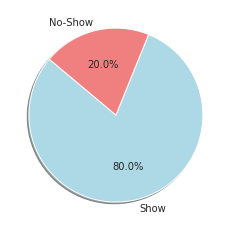

In [87]:
size=[df['No-Show'].tolist().count(0),df['No-Show'].tolist().count(1)]
labels=['Show','No-Show']
color=['lightblue','lightcoral']
plt.pie(size,labels=labels, colors=color,shadow=True, startangle=140,autopct='%1.1f%%')

### Pie chart for appointment attendance

The first pie chart shows that 20.0% of the appointment is not being fulfilled by the patients when the actual appointment date came up. This is not healthy for both sides, the hospital and the patients. The hospitals might need to take the risk of having less patients and less profit it it were a private one, or it could tarnish the healthcare reputation if it were a public one. As for the patients, missing appointmnets may cause more serious and dangerous condition for not being followed up by the doctors.

### Gender

([<matplotlib.patches.Wedge at 0x7f032fd73940>,
 [Text(-0.24763589734005512, -1.0717632492059923, 'Female'),
  Text(0.24763599768577146, 1.0717632260206416, 'Male')],
 [Text(-0.13507412582184822, -0.5845981359305411, '65.0%'),
  Text(0.13507418055587533, 0.5845981232839862, '35.0%')])

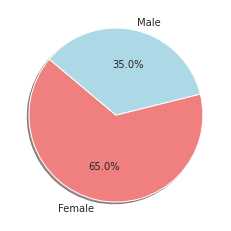

In [88]:
size=[df['Gender'].tolist().count(0),df['Gender'].tolist().count(1)]
labels=['Female','Male']
color=['lightcoral','lightblue']
plt.pie(size,labels=labels, colors=color,shadow=True, startangle=140,autopct='%1.1f%%')

### Pie chart for patient gender

The second pie chart illustrates that 65% of the appointments were made for female patients while only 35% were for male. This could be assumed either female are more concious on their health or female are more prone to diseases compared to male.

### SMS_received

([<matplotlib.patches.Wedge at 0x7f032f8481d0>,
 [Text(-0.15529121987321212, -1.0889833042936379, 'No SMS_received'),
  Text(0.15529121987321226, 1.0889833042936379, 'SMS_received')],
 [Text(-0.08470430174902478, -0.5939908932510751, '67.7%'),
  Text(0.08470430174902485, 0.5939908932510751, '32.3%')])

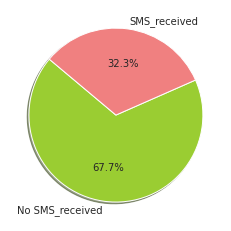

In [89]:

size=[df['SMS_received'].tolist().count(0),df['SMS_received'].tolist().count(1)]
labels=['No SMS_received','SMS_received']
color=['yellowgreen','lightcoral']
plt.pie(size,labels=labels, colors=color,shadow=True, startangle=140,autopct='%1.1f%%')

### Pie chart for SMS received

The third pie chart illustrates that only 32.3% patients who have made appointments were reminded through SMS. There could be more than one medium for reminding, which covered the rest 67.9%. However, if it was the only medium for reminding, it could be assumed that the hospital took less concern in reminding the patients or it was according to the preferences of the patients.

### Handicap

([<matplotlib.patches.Wedge at 0x7f032fa8dc18>,
 [Text(0.7959737675678222, -0.7592270815400929, 'No-Handicap'),
  Text(-0.7959737942243104, 0.7592270535934265, 'Handicap')],
 [Text(0.43416750958244843, -0.4141238626582324, '98.0%'),
  Text(-0.43416752412235105, 0.4141238474145962, '2.0%')])

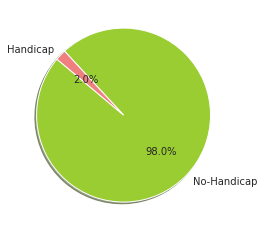

In [90]:
size=[df['Handicap'].tolist().count(0),df['Handicap'].tolist().count(1)]
labels=['No-Handicap','Handicap']
color=['yellowgreen','lightcoral']
plt.pie(size,labels=labels, colors=color,shadow=True, startangle=140,autopct='%1.1f%%')

### Pie chart for handicapped patients

The fourth pie chart illustrates that only 2.0% patients who have made appointments were handicapped. This number is small but significant for the hospital to provide special service in order to support them for example offering delivery service, special package for them or providing assisstance in term of handicap-friendly hospital layout. 

### Alcoholism

([<matplotlib.patches.Wedge at 0x7f032fb605f8>,
 [Text(0.7711444706004175, -0.7844336845536416, 'No-Alcoholism'),
  Text(-0.7711444797809152, 0.7844336755286718, 'Alcoholism')],
 [Text(0.42062425669113673, -0.42787291884744083, '97.0%'),
  Text(-0.420624261698681, 0.4278729139247301, '3.0%')])

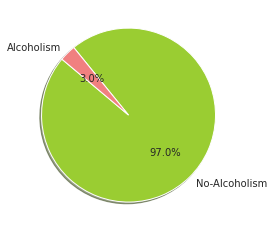

In [91]:
size=[df['Alcoholism'].tolist().count(0),df['Alcoholism'].tolist().count(1)]
labels=['No-Alcoholism','Alcoholism']
color=['yellowgreen','lightcoral']
plt.pie(size,labels=labels, colors=color,shadow=True, startangle=140,autopct='%1.1f%%')

### Pie chart for patients alcoholism condition

The fifth pie chart illustrates that only 3% patients who have made appointments were alcoholism. This number is small but significant for the hospital to provide special service in order to support them. 

### Diabetes

([<matplotlib.patches.Wedge at 0x7f032fcf6080>,
 [Text(0.6629822686251609, -0.877755382489128, 'No-Diabetes'),
  Text(-0.6629822480798133, 0.8777553980073475, 'with Diabetes')],
 [Text(0.36162669197736047, -0.47877566317588793, '92.8%'),
  Text(-0.36162668077080723, 0.47877567164037127, '7.2%')])

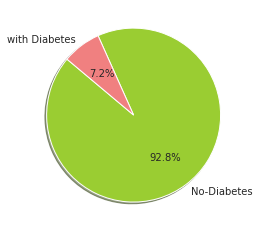

In [92]:
size=[df['Diabetes'].tolist().count(0),df['Diabetes'].tolist().count(1)]
labels=['No-Diabetes','with Diabetes']
color=['yellowgreen','lightcoral']
plt.pie(size,labels=labels, colors=color,shadow=True, startangle=140,autopct='%1.1f%%')

### Pie chart for patient condition of having diabetes

The sixth pie chart illustrates that only 7.2% patients who have made appointments were diebetic. This number is small but significant for the hospital to provide special service in order to support them.

### Scholarship

([<matplotlib.patches.Wedge at 0x7f032f9faac8>,
 [Text(0.5880848531644862, -0.9296000244613298, 'No-Scholarship'),
  Text(-0.5880848096467681, 0.9296000519915674, 'with Scholarship')],
 [Text(0.32077355627153786, -0.5070545587970889, '90.2%'),
  Text(-0.3207735325346007, 0.5070545738135822, '9.8%')])

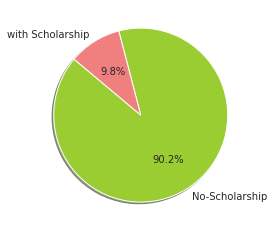

In [93]:
size=[df['Scholarship'].tolist().count(0),df['Scholarship'].tolist().count(1)]
labels=['No-Scholarship','with Scholarship']
color=['yellowgreen','lightcoral']
plt.pie(size,labels=labels, colors=color,shadow=True, startangle=140,autopct='%1.1f%%')

### Pie chart for scholarship received by patients

The seventh pie chart illustrates that 90.2% patients who have made appointments were not medically funded. This number is significant for the hospital to plan and provide special service in order to support them.

### Hipertension

([<matplotlib.patches.Wedge at 0x7f032f94b518>,
 [Text(0.27489366585329666, -1.0650978699038582, 'No-hipertension'),
  Text(-0.27489356613163585, 1.0650978956412562, 'with hipertension')],
 [Text(0.14994199955634363, -0.5809624744930135, '80.3%'),
  Text(-0.14994194516271045, 0.5809624885315942, '19.7%')])

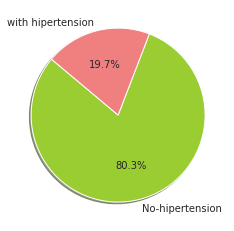

In [94]:
size=[df['Hypertension'].tolist().count(0),df['Hypertension'].tolist().count(1)]
labels=['No-hipertension','with hipertension']
color=['yellowgreen','lightcoral']
plt.pie(size,labels=labels, colors=color,shadow=True, startangle=140,autopct='%1.1f%%')

### Pie chart for patient condition of having hypertension

The eighth pie chart illustrates that 19.7% patients who have made appointments were diagnosed with hypertension. This percentage is quit significant for the hospital to plan and execute program or services for them.

# We use heatmap to see if there is any corrolation between data

In [95]:
df.head()

,PatientId,AppointmentID,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,Gender,No-Show,hour,year,month,dayofweek,date,Gender-name,dayofweek-name,month_name
0,29900000000000.0,5642903.0,2016-04-29 18:38:08+00:00,2016-04-29T00:00:00Z,62.0,JARDIM DA PENHA,0.0,1.0,0.0,0.0,0.0,0.0,0,0,18.0,2016.0,4.0,4.0,2016-04-29,Female,Fri,Apr
1,559000000000000.0,5642503.0,2016-04-29 16:08:27+00:00,2016-04-29T00:00:00Z,56.0,JARDIM DA PENHA,0.0,0.0,0.0,0.0,0.0,0.0,1,0,16.0,2016.0,4.0,4.0,2016-04-29,Male,Fri,Apr
2,4260000000000.0,5642549.0,2016-04-29 16:19:04+00:00,2016-04-29T00:00:00Z,62.0,MATA DA PRAIA,0.0,0.0,0.0,0.0,0.0,0.0,0,0,16.0,2016.0,4.0,4.0,2016-04-29,Female,Fri,Apr
3,868000000000.0,5642828.0,2016-04-29 17:29:31+00:00,2016-04-29T00:00:00Z,8.0,PONTAL DE CAMBURI,0.0,0.0,0.0,0.0,0.0,0.0,0,0,17.0,2016.0,4.0,4.0,2016-04-29,Female,Fri,Apr
4,8840000000000.0,5642494.0,2016-04-29 16:07:23+00:00,2016-04-29T00:00:00Z,56.0,JARDIM DA PENHA,0.0,1.0,1.0,0.0,0.0,0.0,0,0,16.0,2016.0,4.0,4.0,2016-04-29,Female,Fri,Apr


Corr between Hour and the day of week

In [96]:
groupByHD=df.groupby(['dayofweek-name','hour']).count()['Age'].unstack(level=-1)
groupByHD

hour,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0,14.0,15.0,16.0,17.0,18.0,19.0,20.0,21.0
dayofweek-name,,,,,,,,,,,,,,,,
Fri,344.0,3552.0,3038.0,2074.0,1961.0,1424.0,740.0,1409.0,1436.0,1257.0,815.0,362.0,200.0,53.0,12.0,NaN
Mon,270.0,3440.0,3033.0,2787.0,2182.0,1905.0,1289.0,1807.0,1955.0,1691.0,1265.0,749.0,266.0,158.0,15.0,1.0
Sat,NaN,3.0,1.0,6.0,3.0,4.0,NaN,1.0,1.0,3.0,1.0,NaN,NaN,NaN,NaN,NaN
Thu,283.0,3161.0,2233.0,1990.0,1831.0,1247.0,764.0,1522.0,1486.0,1368.0,981.0,548.0,311.0,80.0,20.0,NaN
Tue,322.0,4763.0,3386.0,3005.0,2472.0,1890.0,1506.0,2151.0,2120.0,1889.0,1267.0,689.0,312.0,94.0,31.0,1.0
Wed,350.0,4185.0,3434.0,2798.0,2437.0,1858.0,1068.0,2017.0,2002.0,1770.0,1147.0,534.0,240.0,94.0,20.0,1.0


Text(87.0, 0.5, 'Day Of Week')

<Figure size 432x288 with 0 Axes>

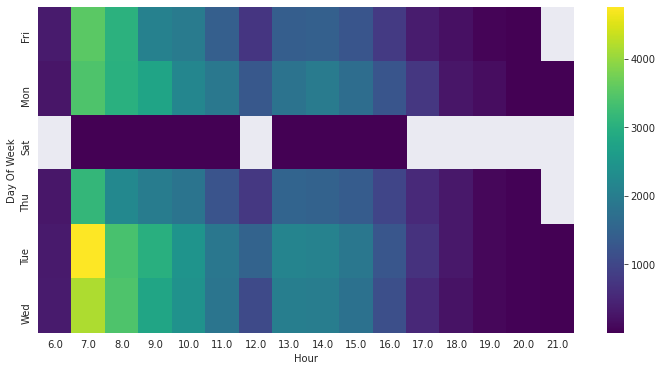

In [97]:
fig=plt.figure()
fig, ax=plt.subplots(figsize=(12,6))
sns.heatmap(groupByHD, cmap='viridis')
plt.xlabel('Hour')
plt.ylabel('Day Of Week')

Corr between Hour and the day of week, when the people not show

In [98]:
groupByHD_NoShow=df[(df['No-Show']==1)].groupby(['dayofweek-name','hour']).count()['Age'].unstack(level=-1)
groupByHD_NoShow

hour,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0,14.0,15.0,16.0,17.0,18.0,19.0,20.0,21.0
dayofweek-name,,,,,,,,,,,,,,,,
Fri,65.0,525.0,611.0,429.0,419.0,339.0,143.0,316.0,317.0,296.0,172.0,87.0,44.0,9.0,8.0,NaN
Mon,44.0,497.0,496.0,507.0,403.0,447.0,283.0,384.0,418.0,397.0,289.0,221.0,49.0,32.0,4.0,NaN
Sat,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Thu,41.0,481.0,394.0,402.0,433.0,292.0,145.0,329.0,364.0,289.0,225.0,132.0,61.0,21.0,3.0,NaN
Tue,90.0,734.0,610.0,571.0,591.0,429.0,275.0,448.0,468.0,435.0,284.0,163.0,79.0,22.0,9.0,1.0
Wed,60.0,651.0,615.0,566.0,540.0,379.0,233.0,372.0,448.0,418.0,321.0,105.0,49.0,26.0,5.0,NaN


Text(87.0, 0.5, 'Day Of Week')

<Figure size 432x288 with 0 Axes>

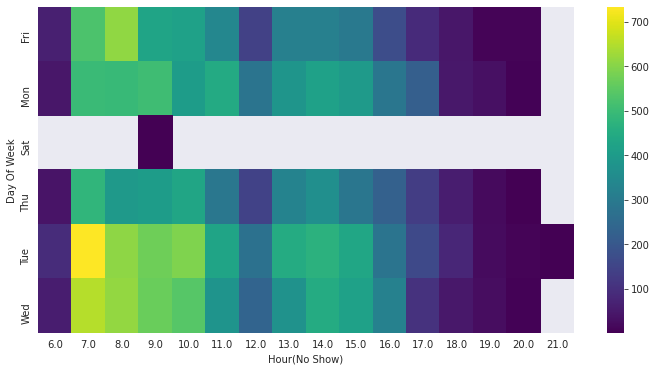

In [99]:
fig=plt.figure()
fig, ax=plt.subplots(figsize=(12,6))
sns.heatmap(groupByHD_NoShow, cmap='viridis')
plt.xlabel('Hour(No Show)')
plt.ylabel('Day Of Week')

As there are many Nan in the Sat days, and hour=21, so we remove them from the data groupby

In [100]:
groupByHD_NoShow_RemoveNan=df[(df['No-Show']==1)&(df['dayofweek-name']!='Sat')&(df['hour']!=21)].groupby(['dayofweek-name','hour']).count()['Age'].unstack(level=-1)
groupByHD_NoShow_RemoveNan

hour,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0,14.0,15.0,16.0,17.0,18.0,19.0,20.0
dayofweek-name,,,,,,,,,,,,,,,
Fri,65,525,611,429,419,339,143,316,317,296,172,87,44,9,8
Mon,44,497,496,507,403,447,283,384,418,397,289,221,49,32,4
Thu,41,481,394,402,433,292,145,329,364,289,225,132,61,21,3
Tue,90,734,610,571,591,429,275,448,468,435,284,163,79,22,9
Wed,60,651,615,566,540,379,233,372,448,418,321,105,49,26,5


Text(87.0, 0.5, 'Day Of Week')

<Figure size 432x288 with 0 Axes>

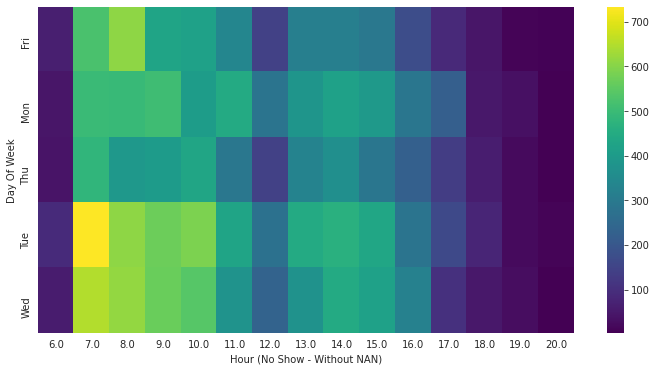

In [101]:
fig=plt.figure()
fig, ax=plt.subplots(figsize=(12,6))
sns.heatmap(groupByHD_NoShow_RemoveNan, cmap='viridis')
plt.xlabel('Hour (No Show - Without NAN)')
plt.ylabel('Day Of Week')

We can see there highly corrolated hours and day of week that are shown by mostly yellowish colour

now we can create cluster map out of the dataframe, to see the most similar hours together based on the dataframe

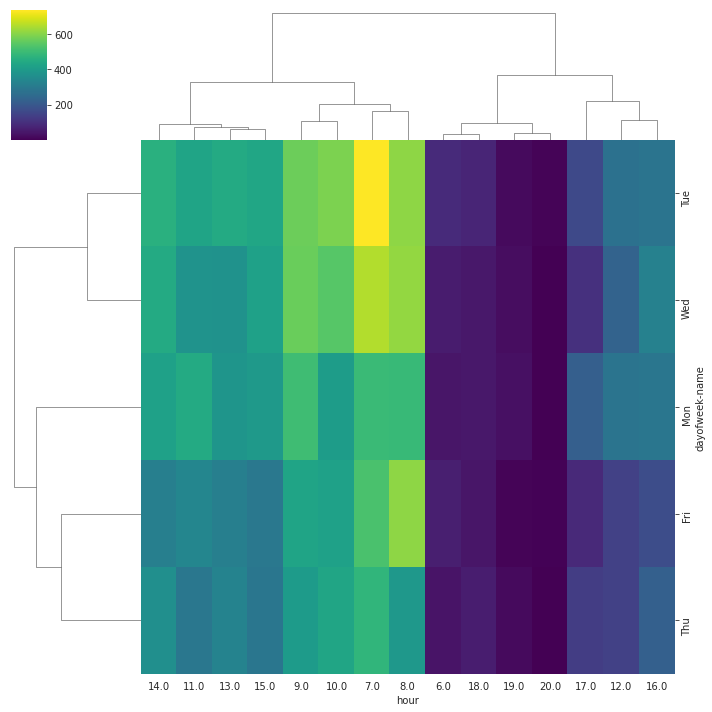

In [102]:
sns.clustermap(groupByHD_NoShow_RemoveNan, cmap='viridis')

### Heatmap for correlation between day and hour when patients did not show up 

The heatmap clusters together the time according to the level of correlation to the day, when patients failed to show up. The lighter the colour towards yellowish, the higher is the correlation. This is illustrated by the cluster on the left side of the heatmap where the brightest yellow is at 7 am on Tuesday. This agrees with previous column and line chart showing that the hour and day with highest missed appointments is 7am and Tuesday respectively.

Now reapet this to see the relationship between Month and day of week

In [103]:
groupByDM_NoShow_RemoveNan=df[(df['No-Show']==1)&(df['dayofweek-name']!='Sat')&(df['month']!=12)].groupby(['dayofweek-name','month_name']).count()['Age'].unstack(level=-1)
groupByDM_NoShow_RemoveNan

month_name,Apr,Feb,Jan,Jun,Mar,May
dayofweek-name,,,,,,
Fri,1600,19,5,302,121,1733
Mon,1424,9,3,196,201,2635
Thu,1241,17,8,327,227,1791
Tue,1663,18,1,115,346,3051
Wed,1703,13,1,436,258,2377


Text(87.0, 0.5, 'Day Of Week')

<Figure size 432x288 with 0 Axes>

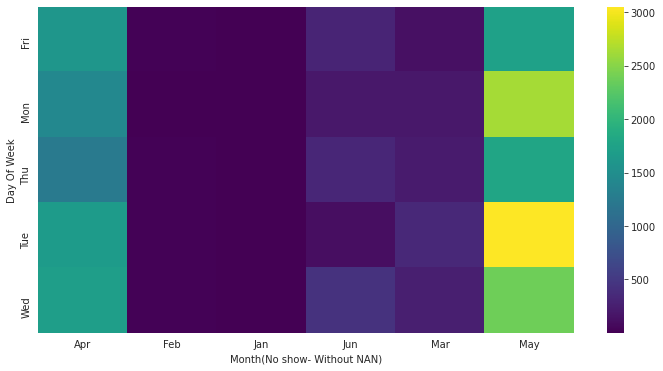

In [104]:
fig=plt.figure()
fig, ax=plt.subplots(figsize=(12,6))
sns.heatmap(groupByDM_NoShow_RemoveNan, cmap='viridis')
plt.xlabel('Month(No show- Without NAN)')
plt.ylabel('Day Of Week')

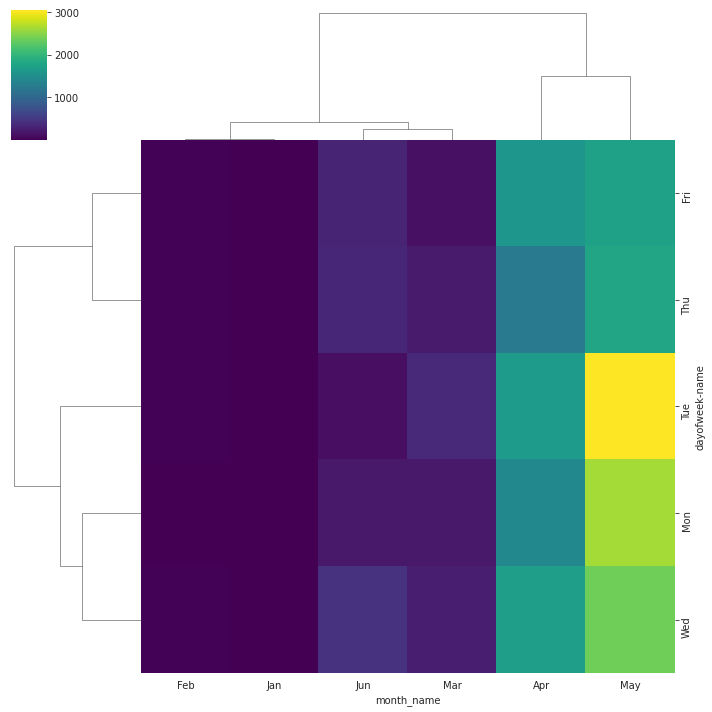

In [105]:
sns.clustermap(groupByDM_NoShow_RemoveNan, cmap='viridis')

### Heatmap for correlation between day and month when patients did not show up 

The heatmap clusters together the month according to the level of correlation to the day, when patients failed to show up. The lighter the colour towards yellowish, the higher is the correlation. This is illustrated by the cluster on the right side of the heatmap where the brightest yellow is on Tuesday on March. This agrees with previous column and line chart showing that the day and month with highest missed appointments is Tueday and May respectively. It is also seen the month of January had the least missed appointment.



# Saving the dat frame file into a file named : No-Show - Clean.csv, with no additional indexing in the file

In [106]:
# df.to_csv('No-Show - Clean.csv', index_label=None, index=False)

# Using Machine Learning appraches 

In [107]:
df =pd.read_csv('No-Show - Clean.csv',index_col=None,)
df

,Unnamed: 0,PatientId,AppointmentID,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,Gender,No-Show,hour,year,month,dayofweek,date
0,0,2.990000e+13,5642903.0,2016-04-29 18:38:08+00:00,2016-04-29T00:00:00Z,62.0,JARDIM DA PENHA,0.0,1.0,0.0,0.0,0.0,0.0,0,0,18.0,2016.0,4.0,4.0,2016-04-29
1,1,5.590000e+14,5642503.0,2016-04-29 16:08:27+00:00,2016-04-29T00:00:00Z,56.0,JARDIM DA PENHA,0.0,0.0,0.0,0.0,0.0,0.0,1,0,16.0,2016.0,4.0,4.0,2016-04-29
2,2,4.260000e+12,5642549.0,2016-04-29 16:19:04+00:00,2016-04-29T00:00:00Z,62.0,MATA DA PRAIA,0.0,0.0,0.0,0.0,0.0,0.0,0,0,16.0,2016.0,4.0,4.0,2016-04-29
3,3,8.680000e+11,5642828.0,2016-04-29 17:29:31+00:00,2016-04-29T00:00:00Z,8.0,PONTAL DE CAMBURI,0.0,0.0,0.0,0.0,0.0,0.0,0,0,17.0,2016.0,4.0,4.0,2016-04-29
4,4,8.840000e+12,5642494.0,2016-04-29 16:07:23+00:00,2016-04-29T00:00:00Z,56.0,JARDIM DA PENHA,0.0,1.0,1.0,0.0,0.0,0.0,0,0,16.0,2016.0,4.0,4.0,2016-04-29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109186,110522,2.570000e+12,5651768.0,2016-05-03 09:15:35+00:00,2016-06-07T00:00:00Z,56.0,MARIA ORTIZ,0.0,0.0,0.0,0.0,0.0,1.0,0,0,9.0,2016.0,5.0,1.0,2016-05-03
109187,110523,3.600000e+12,5650093.0,2016-05-03 07:27:33+00:00,2016-06-07T00:00:00Z,51.0,MARIA ORTIZ,0.0,0.0,0.0,0.0,0.0,1.0,0,0,7.0,2016.0,5.0,1.0,2016-05-03
109188,110524,1.560000e+13,5630692.0,2016-04-27 16:03:52+00:00,2016-06-07T00:00:00Z,21.0,MARIA ORTIZ,0.0,0.0,0.0,0.0,0.0,1.0,0,0,16.0,2016.0,4.0,2.0,2016-04-27
109189,110525,9.210000e+13,5630323.0,2016-04-27 15:09:23+00:00,2016-06-07T00:00:00Z,38.0,MARIA ORTIZ,0.0,0.0,0.0,0.0,0.0,1.0,0,0,15.0,2016.0,4.0,2.0,2016-04-27


Calculate the time difference between the schedule day and appointment day

In [108]:
df['ScheduledDay']=pd.to_datetime(df['ScheduledDay'])
df['AppointmentDay']=pd.to_datetime(df['AppointmentDay'])
df['Time_Difference']=df['AppointmentDay']-df['ScheduledDay']

In [109]:
df[df['Time_Difference']< datetime.timedelta(seconds=1)].count()

Unnamed: 0         38497
PatientId          38497
AppointmentID      38497
ScheduledDay       38497
AppointmentDay     38497
Age                38497
Neighbourhood      38497
Scholarship        38497
Hypertension       38497
Diabetes           38497
Alcoholism         38497
Handicap           38497
SMS_received       38497
Gender             38497
No-Show            38497
hour               38497
year               38497
month              38497
dayofweek          38497
date               38497
Time_Difference    38497
dtype: int64

count the total second for all the time differences

In [110]:
df['totalSecons']=df['Time_Difference'].apply(lambda x: x.total_seconds())

# pre processing
models working based on the numerical data so accuratly so, we should check out the data, in order to see what data is suitable to fit the models. Thus, object data better off to be removed. Also, there are two more columns, including PatientId, and AppointmentID , that can not be used in the prediction, so better to remove them as well.

In [111]:
df.drop(['ScheduledDay','AppointmentDay','date','Time_Difference','PatientId','AppointmentID'], axis=1, inplace=True)
df

,Unnamed: 0,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,Gender,No-Show,hour,year,month,dayofweek,totalSecons
0,0,62.0,JARDIM DA PENHA,0.0,1.0,0.0,0.0,0.0,0.0,0,0,18.0,2016.0,4.0,4.0,-67088.0
1,1,56.0,JARDIM DA PENHA,0.0,0.0,0.0,0.0,0.0,0.0,1,0,16.0,2016.0,4.0,4.0,-58107.0
2,2,62.0,MATA DA PRAIA,0.0,0.0,0.0,0.0,0.0,0.0,0,0,16.0,2016.0,4.0,4.0,-58744.0
3,3,8.0,PONTAL DE CAMBURI,0.0,0.0,0.0,0.0,0.0,0.0,0,0,17.0,2016.0,4.0,4.0,-62971.0
4,4,56.0,JARDIM DA PENHA,0.0,1.0,1.0,0.0,0.0,0.0,0,0,16.0,2016.0,4.0,4.0,-58043.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109186,110522,56.0,MARIA ORTIZ,0.0,0.0,0.0,0.0,0.0,1.0,0,0,9.0,2016.0,5.0,1.0,2990665.0
109187,110523,51.0,MARIA ORTIZ,0.0,0.0,0.0,0.0,0.0,1.0,0,0,7.0,2016.0,5.0,1.0,2997147.0
109188,110524,21.0,MARIA ORTIZ,0.0,0.0,0.0,0.0,0.0,1.0,0,0,16.0,2016.0,4.0,2.0,3484568.0
109189,110525,38.0,MARIA ORTIZ,0.0,0.0,0.0,0.0,0.0,1.0,0,0,15.0,2016.0,4.0,2.0,3487837.0


#### In order to use the Neighborhod feature in our model, we can change the values into numbers, by means of Lablencoder within the preprocessing

In [112]:
Neighborhood_Values=df['Neighbourhood'].unique()
Neighborhood_Values

array(['JARDIM DA PENHA', 'MATA DA PRAIA', 'PONTAL DE CAMBURI',
       'REPÚBLICA', 'GOIABEIRAS', 'ANDORINHAS', 'CONQUISTA',
       'NOVA PALESTINA', 'DA PENHA', 'TABUAZEIRO', 'BENTO FERREIRA',
       'SÃO PEDRO', 'SANTA MARTHA', 'SÃO CRISTÓVÃO', 'MARUÍPE',
       'GRANDE VITÓRIA', 'SÃO BENEDITO', 'ILHA DAS CAIEIRAS',
       'SANTO ANDRÉ', 'SOLON BORGES', 'BONFIM', 'JARDIM CAMBURI',
       'MARIA ORTIZ', 'JABOUR', 'ANTÔNIO HONÓRIO', 'RESISTÊNCIA',
       'ILHA DE SANTA MARIA', 'JUCUTUQUARA', 'MONTE BELO',
       'MÁRIO CYPRESTE', 'SANTO ANTÔNIO', 'BELA VISTA', 'PRAIA DO SUÁ',
       'SANTA HELENA', 'ITARARÉ', 'INHANGUETÁ', 'UNIVERSITÁRIO',
       'SÃO JOSÉ', 'REDENÇÃO', 'SANTA CLARA', 'CENTRO', 'PARQUE MOSCOSO',
       'DO MOSCOSO', 'SANTOS DUMONT', 'CARATOÍRA', 'ARIOVALDO FAVALESSA',
       'ILHA DO FRADE', 'GURIGICA', 'JOANA D´ARC', 'CONSOLAÇÃO',
       'PRAIA DO CANTO', 'BOA VISTA', 'MORADA DE CAMBURI', 'SANTA LUÍZA',
       'SANTA LÚCIA', 'BARRO VERMELHO', 'ESTRELINHA', 'FORTE SÃO 

In [113]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
df['Neighbourhood']=encoder.fit_transform(df['Neighbourhood'])
# df.drop(['Neighbourhood'], axis=1, inplace=True)
df.head()

,Unnamed: 0,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,Gender,No-Show,hour,year,month,dayofweek,totalSecons
0,0,62.0,39,0.0,1.0,0.0,0.0,0.0,0.0,0,0,18.0,2016.0,4.0,4.0,-67088.0
1,1,56.0,39,0.0,0.0,0.0,0.0,0.0,0.0,1,0,16.0,2016.0,4.0,4.0,-58107.0
2,2,62.0,45,0.0,0.0,0.0,0.0,0.0,0.0,0,0,16.0,2016.0,4.0,4.0,-58744.0
3,3,8.0,54,0.0,0.0,0.0,0.0,0.0,0.0,0,0,17.0,2016.0,4.0,4.0,-62971.0
4,4,56.0,39,0.0,1.0,1.0,0.0,0.0,0.0,0,0,16.0,2016.0,4.0,4.0,-58043.0


So data is all numerical and is ready to be feed into the models. Before that we need more steps of pre-processing to scale the data and balance the classes

### Using Under-Sampling Techniques for Extremely Imbalanced Data

based on the pie chart shown previously the number of the classes are extermely imbalanced (20% to 80%). The issue of class imbalance can result in a serious bias towards the majority class, reducing the classification performance and increasing the number of false negatives.  The most commonly used techniques are data resampling either under-sampling the majority of the class, or over-sampling the minority class, or a mix of both.

RandomUnderSampler is a fast and easy way to balance the data by randomly selecting a subset of data for the targeted classes.
RandomUnderSampler allows to bootstrap the data by setting replacement to True. The resampling with multiple classes is performed by considering independently each targeted class.

In [114]:
from collections import Counter
from sklearn.datasets import make_classification
X=df.drop(['No-Show'], axis=1)
# X=df_scaler
y=df['No-Show']
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=0, replacement=True)
X, y = rus.fit_resample(X, y)
print('Resampled dataset shape %s' % Counter(y))

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning:

The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning:

The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.



Resampled dataset shape Counter({0: 21861, 1: 21861})


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.




# Training and Testing Data
Now that we've explored the data a bit, let's go ahead and split the data into training and testing sets.

In [115]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

## K Nearest Neighbors Model
Choosing a K Value-- using for loop that trains various KNN models with different k values, then keep track of the error_rate for each of these models with a list

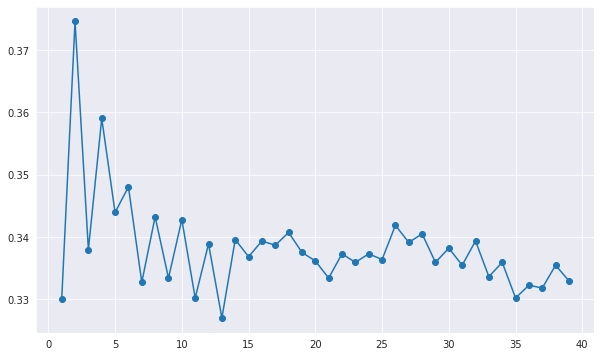

In [116]:
from sklearn.neighbors import KNeighborsClassifier
error_rate=[]
for i in range(1,40):
    knn_i=KNeighborsClassifier(n_neighbors=i)
    knn_i.fit(X_train,y_train)
    pred_i=knn_i.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

sns.set_style('darkgrid')
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate, marker='o')

In [117]:

from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
KNN_Model=KNeighborsClassifier(n_neighbors=35)
KNN_Model.fit(X_train,y_train)
KNN_Model_prediction=KNN_Model.predict(X_test)
print(classification_report(y_test,KNN_Model_prediction))
print(accuracy_score(y_test,KNN_Model_prediction))

              precision    recall  f1-score   support

           0       0.74      0.53      0.62      2202
           1       0.63      0.81      0.71      2171

    accuracy                           0.67      4373
   macro avg       0.68      0.67      0.66      4373
weighted avg       0.68      0.67      0.66      4373

0.6697919048707981


## ANN
We choose a DNN architecture since we effectively want to predict the outcome

In [118]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.backend import reshape
from keras.utils.np_utils import to_categorical
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix


In [119]:
def create_baseline():
    # create model
    nnet = Sequential()
    nnet.add(Dense(units=14, kernel_initializer='uniform', activation='relu', input_dim=14))
    # Add second hidden layer
    for i in range(2):
        nnet.add(Dense(units=14, kernel_initializer='uniform', activation='relu'))
    # Add output layer
    nnet.add(Dense(units=1, kernel_initializer='uniform', activation='sigmoid'))
    # Compile network
    nnet.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return nnet
model = create_baseline()
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 14)                210       
_________________________________________________________________
dense_1 (Dense)              (None, 14)                210       
_________________________________________________________________
dense_2 (Dense)              (None, 14)                210       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 15        
Total params: 645
Trainable params: 645
Non-trainable params: 0
_________________________________________________________________
None


In [120]:
from sklearn import preprocessing
mm_scaler = preprocessing.StandardScaler()
X_train_scaler = mm_scaler.fit_transform(X_train)
X_test_scaler= mm_scaler.fit_transform(X_test)
X_test_scaler

array([[-0.07326921,  1.10141875, -0.28764834, ..., -0.99888773,
         0.08367001, -0.30685487],
       [ 0.01588849,  1.14534812, -1.49991732, ...,  0.34185384,
         0.81986513, -0.0041385 ],
       [-1.36015507,  0.48640754, -0.5121426 , ...,  0.34185384,
         0.08367001, -0.75523237],
       ...,
       [-1.00736373, -0.26039178,  1.46340684, ..., -0.99888773,
        -1.38872022, -0.26221661],
       [ 0.76414601, -0.39217989,  1.64300225, ...,  0.34185384,
        -1.38872022, -0.62968844],
       [ 0.72691567, -1.0071911 , -0.24274949, ...,  0.34185384,
        -0.6525251 , -0.74300049]])

In [ ]:
history =model.fit(X_train_scaler, y_train, batch_size=8, epochs=100, validation_data=(X_test_scaler, y_test))

In [ ]:
import matplotlib.pyplot as plt
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## Naive bayses, the fastest and the simplest model 

In [ ]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.naive_bayes import GaussianNB
GaussianNB_Model=GaussianNB()
GaussianNB_Model.fit(X_train,y_train)
GaussianNB_Model_prediction=GaussianNB_Model.predict(X_test)
print(classification_report(y_test,GaussianNB_Model_prediction))
print(accuracy_score(y_test,GaussianNB_Model_prediction))
print(confusion_matrix(y_test,GaussianNB_Model_prediction))